In [196]:
#IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

In [206]:
#DATA LOADING
#ld.size
ld = pd.read_csv (r'hotel_bookings.csv')
ld = ld.iloc[0:2999]
ld.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [162]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           2999 non-null   object 
 1   is_canceled                     2999 non-null   int64  
 2   lead_time                       2999 non-null   int64  
 3   arrival_date_year               2999 non-null   int64  
 4   arrival_date_month              2999 non-null   object 
 5   arrival_date_week_number        2999 non-null   int64  
 6   arrival_date_day_of_month       2999 non-null   int64  
 7   stays_in_weekend_nights         2999 non-null   int64  
 8   stays_in_week_nights            2999 non-null   int64  
 9   adults                          2999 non-null   int64  
 10  children                        2999 non-null   float64
 11  babies                          2999 non-null   int64  
 12  meal                            29

In [163]:
#DATA CLEANING
# Checking for NaN values
ld.isnull().sum()

hotel                                0
is_canceled                          0
lead_time                            0
arrival_date_year                    0
arrival_date_month                   0
arrival_date_week_number             0
arrival_date_day_of_month            0
stays_in_weekend_nights              0
stays_in_week_nights                 0
adults                               0
children                             0
babies                               0
meal                                 0
country                              1
market_segment                       0
distribution_channel                 0
is_repeated_guest                    0
previous_cancellations               0
previous_bookings_not_canceled       0
reserved_room_type                   0
assigned_room_type                   0
booking_changes                      0
deposit_type                         0
agent                              465
company                           2876
days_in_waiting_list     

In [164]:
# We see that country, agent, company columns have NaN values
# these we want to either remove or fix, so that we won't get 
# inaccurate results based on these

In [165]:
# Check country data
ld['country'].describe()

count     2998
unique      53
top        PRT
freq      1774
Name: country, dtype: object

In [166]:
#List of occurences of each country
country = ld['country']
country = pd.DataFrame(country.value_counts())
print(country)

     country
PRT     1774
ESP      343
GBR      316
IRL      143
FRA       79
DEU       38
NLD       35
CN        28
USA       27
BEL       22
CHE       22
POL       19
RUS       18
ITA       15
BRA       13
ROU       12
AUT       10
FIN        8
SWE        7
LVA        6
DNK        5
NOR        4
ARG        4
LUX        4
IND        3
CHN        3
AUS        3
CZE        2
OMN        2
SVN        2
EST        2
DZA        2
MAR        2
MEX        2
CHL        2
MOZ        2
TUR        2
LTU        2
SRB        1
ISR        1
ZMB        1
BWA        1
UKR        1
CYM        1
BLR        1
ZWE        1
AGO        1
ZAF        1
ALB        1
SMR        1
CPV        1
GRC        1
PRI        1


In [167]:
# Here we see single NaN value we have in the dataset
ld[ld['country'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
30,Resort Hotel,0,118,2015,July,27,1,4,10,1,...,No Deposit,NaN,NaN,0,Transient,62.0,0,2,Check-Out,2015-07-15


In [168]:
# to clean this up, we will try estimate a guess for this value
# We will compare the value of lead_time = 118 and see which country 
# would have the highest change of fitting the country that haven't been entered.
ld[ld['lead_time'] == 118]['country'].value_counts()

PRT    7
GBR    3
Name: country, dtype: int64

In [169]:
# Here we see that PRT is the most likely country to fit this NaN
# therefore we will fill the NaN with PRT
ld['country'] = ld['country'].fillna('PRT')

# not we shouldn't have any NaN values in the country coloumn anymore
ld['country'].isnull().sum()

0

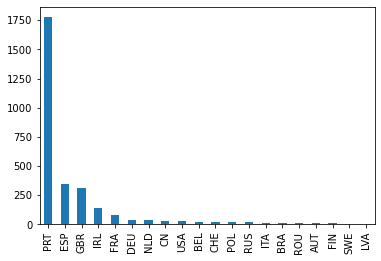

In [170]:
# plot country results
ld['country'].value_counts()[:20].plot(kind='bar')

In [171]:
# Now we will clean the company coloumn
ld['company'].describe()

count    123.000000
mean     221.178862
std       83.433790
min       12.000000
25%      115.500000
50%      270.000000
75%      281.000000
max      318.000000
Name: company, dtype: float64

In [172]:
ld['company'].value_counts()

281.0    43
110.0    18
307.0     8
268.0     7
94.0      5
223.0     4
317.0     4
154.0     4
113.0     3
174.0     3
270.0     3
195.0     3
59.0      2
178.0     2
274.0     2
312.0     2
240.0     2
204.0     1
286.0     1
53.0      1
318.0     1
47.0      1
118.0     1
12.0      1
144.0     1
Name: company, dtype: int64

In [173]:
# We know there is 3000 entries in the dataset and the company coloumn
# contains 2876 NaN values. This is most of the entries
print(2876/3000, "% NaN values in 'company'")

0.9586666666666667 % NaN values in 'company'


In [174]:
# Givin that 96% of the Values in the company coloumn is NaN 
# instead of modifying the data is might be better to just remove
# the coloumn itself, which we will
ld = ld.drop(['company'], axis=1)

In [175]:
ld.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                             0
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                             465
days_in_waiting_list                0
customer_type                       0
adr         

In [176]:
# Now we only have the agent coloumn left with NaN values
# and will try to analyse what we can do with this
ld['agent'].describe()

count    2534.000000
mean      209.990529
std        70.282437
min         2.000000
25%       208.000000
50%       240.000000
75%       241.000000
max       334.000000
Name: agent, dtype: float64

In [177]:
ld['agent'].value_counts()

240.0    1242
250.0     246
241.0     151
242.0      68
40.0       56
         ... 
303.0       1
273.0       1
244.0       1
167.0       1
304.0       1
Name: agent, Length: 66, dtype: int64

In [178]:
ld[ld['agent'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,No Deposit,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03
18,Resort Hotel,0,0,2015,July,27,1,0,1,2,...,0,No Deposit,NaN,0,Transient,107.42,0,0,Check-Out,2015-07-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2962,Resort Hotel,0,0,2015,November,46,8,2,4,2,...,0,No Deposit,NaN,0,Transient,74.00,1,0,Check-Out,2015-11-14
2976,Resort Hotel,0,5,2015,November,46,9,1,0,1,...,0,No Deposit,NaN,0,Transient,40.00,0,0,Check-Out,2015-11-10
2978,Resort Hotel,1,0,2015,November,46,9,1,0,1,...,0,No Deposit,NaN,0,Transient,35.00,0,0,Canceled,2015-11-09
2981,Resort Hotel,0,14,2015,November,46,9,1,3,1,...,0,No Deposit,NaN,0,Transient,35.00,0,0,Check-Out,2015-11-13


In [179]:
# The agent coloumn feature as an ID of the traveling agency that made
# the booking. We first thought about just removing this coloumn also
# from the dataset, but thinking straight we can just keep these data, 
# as the booking made from no agency, directly at the hotels.
# But since we don't wan't any NaN values in our dataset, we will simply
# fill all the NaN values with 0.
ld['agent'] = ld['agent'].fillna('0')
ld['agent'].isnull().sum()

0

In [180]:
# Now we finished cleaning our dataset and it is now ready for use
ld.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [181]:
#
# Section 2
# Data analysis
#
#

In [182]:
# Try to find prediction of amount of people arriving at hotels each month 
correlation = ld.corr()["arrival_date_week_number"]
correlation.abs().sort_values(ascending=False)[1:]

adr                               0.586394
arrival_date_day_of_month         0.131951
children                          0.121948
days_in_waiting_list              0.106701
total_of_special_requests         0.094404
stays_in_weekend_nights           0.049542
stays_in_week_nights              0.047716
babies                            0.041718
booking_changes                   0.039783
adults                            0.019274
lead_time                         0.015242
is_canceled                       0.010482
required_car_parking_spaces       0.006884
arrival_date_year                      NaN
is_repeated_guest                      NaN
previous_cancellations                 NaN
previous_bookings_not_canceled         NaN
Name: arrival_date_week_number, dtype: float64

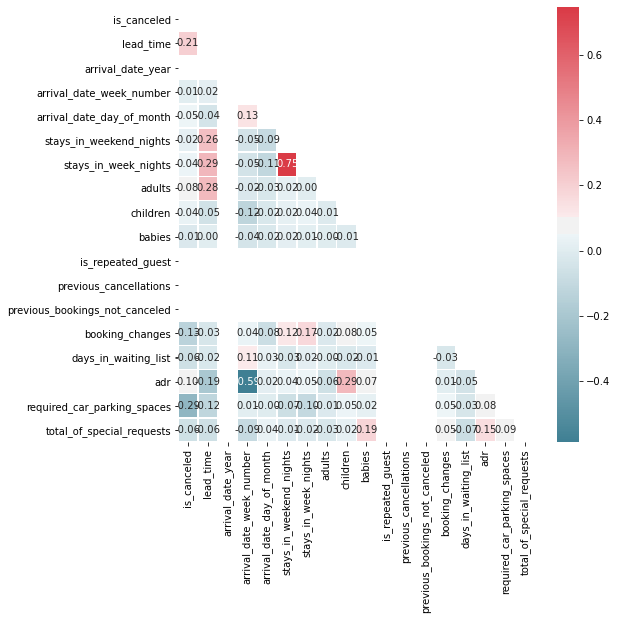

In [183]:
corr = ld.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

In [184]:
# from this graph we see that the targeted 'arrival_date_week_numbers' 
# 'adr', 'children', 'adult', 'babies', 'total_of_specail_requests'

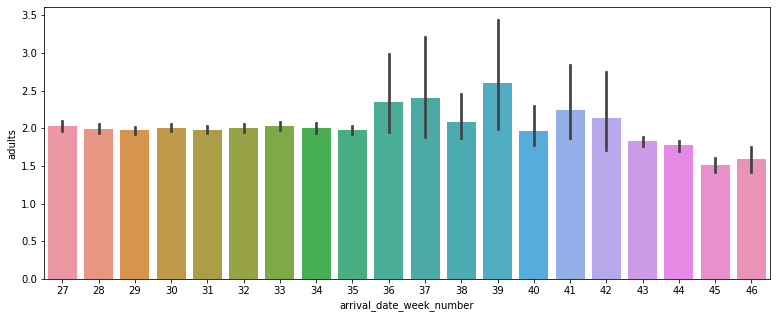

In [185]:
plt.figure(figsize = (13,5))
sns.barplot(x ='arrival_date_week_number', y = 'adults', data = ld)

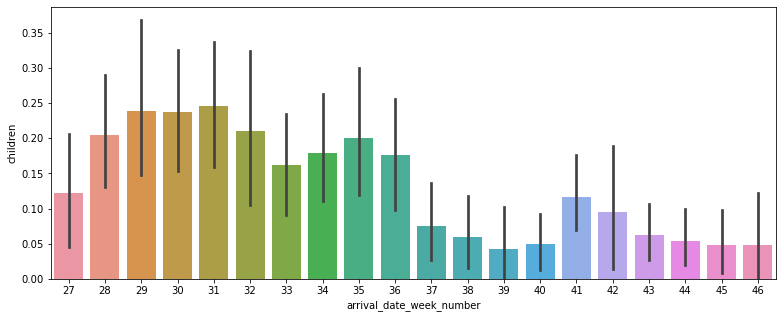

In [186]:
plt.figure(figsize = (13,5))
sns.barplot(x ='arrival_date_week_number', y = 'children', data = ld)

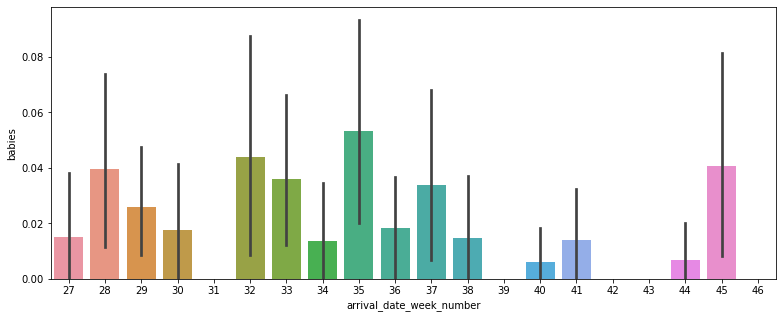

In [187]:
plt.figure(figsize = (13,5))
sns.barplot(x ='arrival_date_week_number', y = 'babies', data = ld)

In [188]:
# sum of all people each month
sum_column = ld["adults"] + ld["children"] + ld['babies']
ld["total_people"] = sum_column
print(ld['total_people'])

0       2.0
1       2.0
2       1.0
3       1.0
4       2.0
       ... 
2994    1.0
2995    2.0
2996    1.0
2997    3.0
2998    2.0
Name: total_people, Length: 2999, dtype: float64


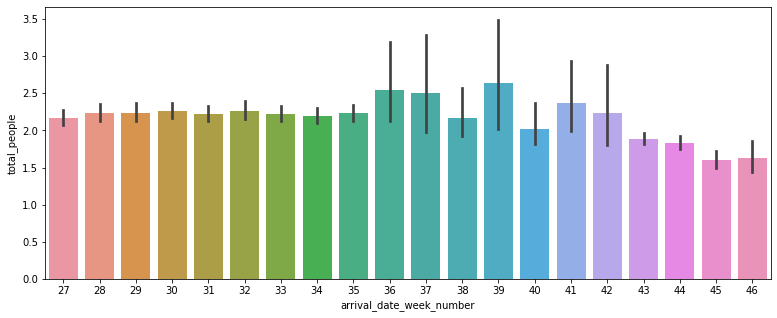

In [189]:
# graph of total people each month
plt.figure(figsize = (13,5))
sns.barplot(x ='arrival_date_week_number', y = 'total_people', data = ld)

In [190]:
# data prediction
# splitting dataset
ld_new = ld.copy()[['adr', 'children', 'adults', 'babies', 'total_of_special_requests', 'arrival_date_week_number']]
ld_new.head()

,adr,children,adults,babies,total_of_special_requests,arrival_date_week_number
0,0.0,0.0,2,0,0,27
1,0.0,0.0,2,0,0,27
2,75.0,0.0,1,0,0,27
3,75.0,0.0,1,0,0,27
4,98.0,0.0,2,0,1,27


In [200]:
x = ld_new.drop(['arrival_date_week_number'], axis=1)
y = ld_new['arrival_date_week_number']

In [201]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, shuffle=False)

In [202]:
model_LogReg_Asli = LogisticRegression()
model_LogReg_Asli.fit(x_train, y_train)
print(model_LogReg_Asli.coef_)
print(model_LogReg_Asli.intercept_)

m = model_LogReg_Asli.coef_[0][0]
c = model_LogReg_Asli.intercept_[0]

[[-7.87567916e-03  2.95964791e-02  4.36413951e-01 -1.17418683e-02
   6.66578579e-02]
 [ 2.54864383e-04  1.89233439e-01  1.68208461e-01  6.17297613e-02
   5.14637887e-02]
 [ 9.63609587e-03  1.97520238e-01 -1.59872302e-01  1.32263448e-02
  -6.43841635e-02]
 [ 1.65733975e-02  8.30626738e-02 -5.37400701e-01 -1.48186974e-02
  -3.31485830e-01]
 [ 1.97326069e-02  6.39978664e-02 -8.43028397e-01 -9.00387103e-02
   8.88958402e-03]
 [ 2.46438983e-02 -6.90602747e-02 -1.22048649e+00  3.11788000e-02
  -4.00119237e-02]
 [ 2.98770329e-02 -2.91892219e-01 -1.32456467e+00  2.46601765e-02
  -1.93911415e-01]
 [ 2.69804670e-02 -1.81273465e-01 -1.22604844e+00 -4.27965952e-02
  -1.57573303e-01]
 [ 1.97180681e-02 -3.44916694e-02 -8.97054556e-01  7.24167386e-02
   9.35275620e-02]
 [-5.68416067e-03  1.12299728e-01  7.53393867e-01 -1.06478817e-02
  -1.19435076e-01]
 [-1.60809427e-02 -8.12060150e-02  1.07392603e+00  4.38676868e-02
  -2.45003231e-02]
 [-1.80934871e-02 -8.16142954e-02  8.93475179e-01 -7.34499797e-03

In [203]:
y_pred = model_RF1.predict(x_test)

NameError: name 'model_RF1' is not defined

In [204]:
print(model_RF1.score(x_train,y_train))
print(model_RF1.score(x_test,y_test))

NameError: name 'model_RF1' is not defined